Memory Table top game 

In a memory game with 8 pairs (16 cards total), what's the probability that Player 1 flips 2 cards and gets a matching pair on the first move?

What is the probability that Player 1 flips two cards and finds a matching pair on their first move in a memory game with 16 cards (8 pairs)? 

My sample space includes all possible pairs of cards drawn from the deck of 16 cards. One trial of the simulation involves shuffling the deck, selecting two cards at random without replacement, and checking if they match. 

The outcome that shall be measured is whether the two cards flipped form a matching pair. By running many trials and calculating the proportion of matches, we estimate the probability of finding a matching pair on the first move, using the multiplication rule to understand the likelihood of consecutive events.

In the game of memory, simulation represents a simulation-based observational study. Instead of collecting data from real players or natural gameplay, it generates synthetic data through a computational model that mimics the game’s mechanics and randomness. The study uses repeated simulated trials to estimate probabilities and analyze outcomes. Because no actual human behavior is observed or manipulated, and all data is produced algorithmically, it is neither an experimental nor a naturalistic observational study, but rather an observational study based on simulated data.

📝 Game Log:
Move 1: Player 1 flips positions 4 and 16
Move 2: Player 2 flips positions 15 and 12
Move 3: Player 1 flips positions 14 and 4
Move 4: Player 2 flips positions 7 and 8
Move 5: Player 1 flips positions 9 and 6
Move 6: Player 2 flips positions 15 and 3
Move 7: Player 1 flips positions 8 and 5
Move 8: Player 2 flips positions 15 and 5
Move 9: Player 1 flips positions 9 and 7
Move 10: Player 2 flips positions 2 and 5
Move 11: Player 1 flips positions 6 and 9
Move 12: Player 2 flips positions 4 and 8
Move 13: Player 1 flips positions 13 and 5
Move 14: Player 2 flips positions 12 and 13
Move 15: Player 1 flips positions 2 and 13
Move 16: Player 2 flips positions 2 and 4
Move 17: Player 1 flips positions 5 and 15
Move 18: Player 2 flips positions 11 and 10
Move 19: Player 1 flips positions 15 and 9
Move 20: Player 2 flips positions 5 and 6
Move 21: Player 1 flips positions 10 and 4
Move 22: Player 2 flips positions 12 and 4
Move 23: Player 1 flips positions 16 and 10
Move 24: Play

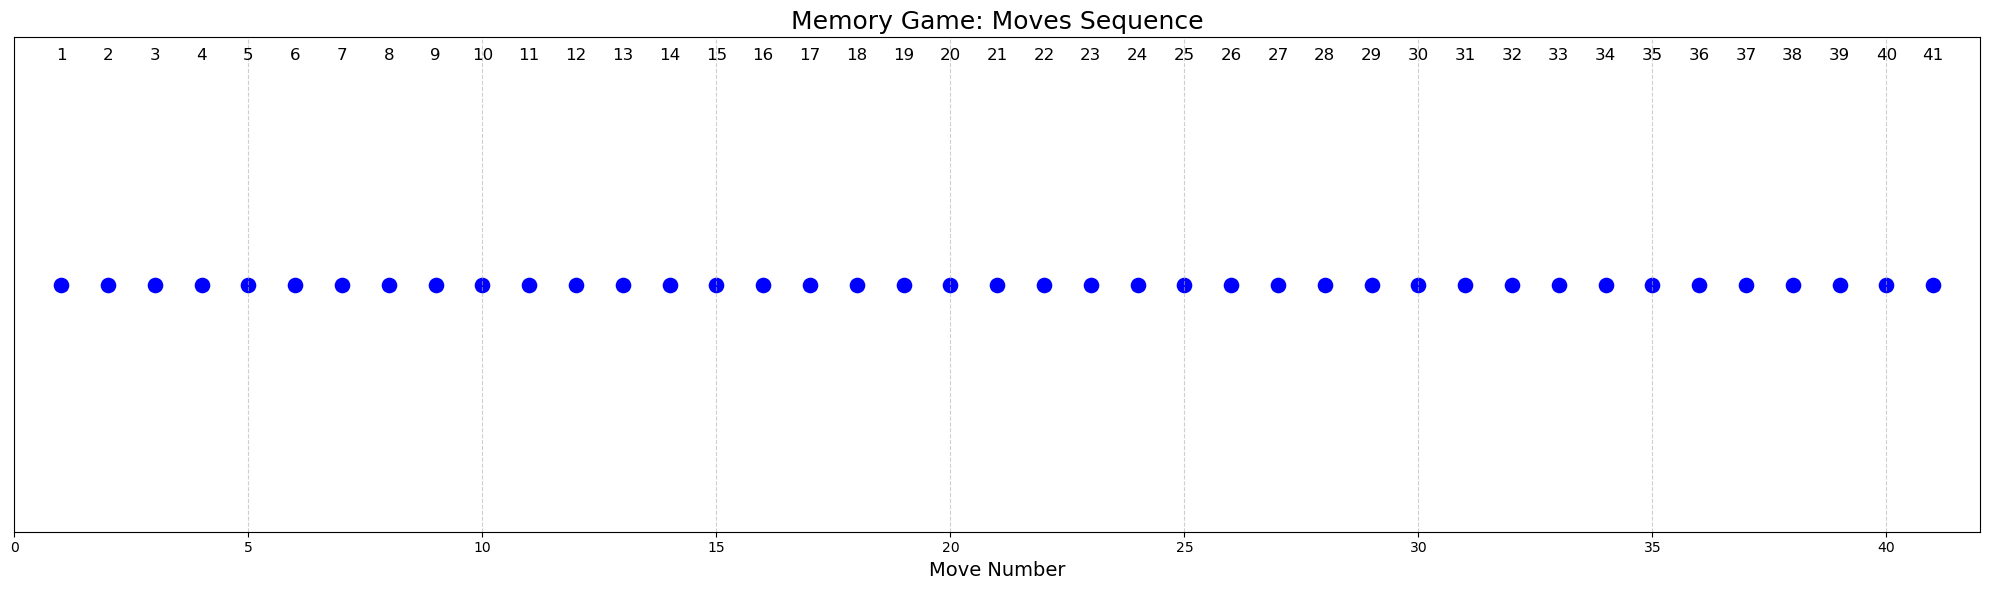


Estimated Probability of matching pair on first move: 0.0500 (5 matches out of 100 trials)


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


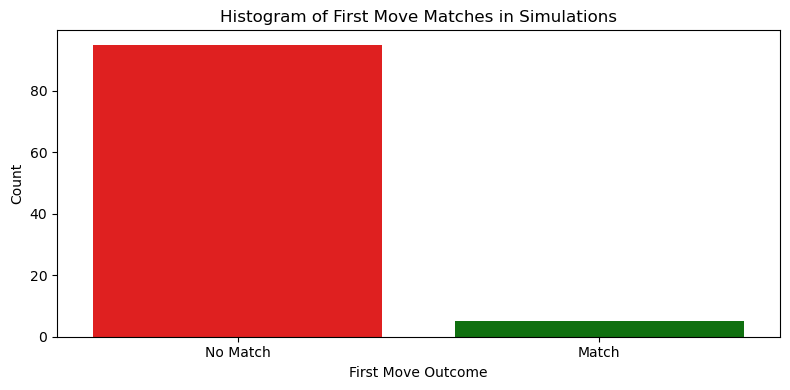

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Memory Game Settings ---
NUM_PAIRS = 8  # total pairs
BOARD_SIZE = NUM_PAIRS * 2
cards = list(range(1, NUM_PAIRS + 1)) * 2
random.shuffle(cards)

# Board representation: -1 matched, 0 face-down, positive face-up
board_state = np.zeros(BOARD_SIZE, dtype=int)

# Players and scores
players = [1, 2]
scores = {1: 0, 2: 0}

# Log moves
move_log = []

def flip_card(index):
    if board_state[index] == 0:
        board_state[index] = cards[index]
        return True
    return False

def hide_cards(indices):
    for idx in indices:
        if board_state[idx] != -1:
            board_state[idx] = 0

def check_match(idx1, idx2):
    return cards[idx1] == cards[idx2]

def all_pairs_found():
    return all(card == -1 for card in board_state)

# --- Play the game ---
turn = 0
game_over = False
move_count = 0

while not game_over:
    player = players[turn % 2]
    face_down_indices = [i for i in range(BOARD_SIZE) if board_state[i] == 0]
    if len(face_down_indices) < 2:
        break

    idx1, idx2 = random.sample(face_down_indices, 2)
    flip_card(idx1)
    flip_card(idx2)
    move_count += 1

    move_log.append(f"Move {move_count}: Player {player} flips positions {idx1+1} and {idx2+1}")

    if check_match(idx1, idx2):
        board_state[idx1] = -1
        board_state[idx2] = -1
        scores[player] += 1
        move_log.append(f"Player {player} found a match: {cards[idx1]}")
        if all_pairs_found():
            game_over = True
            winner = player
            break
    else:
        hide_cards([idx1, idx2])
        turn += 1

# --- Print Game Log ---
print("📝 Game Log:")
for log in move_log:
    print(log)

if all_pairs_found():
    print(f"\n🎉 Player {winner} wins after {move_count} moves!")
else:
    print("\n🤝 It's a draw!")

# --- Final Board Display ---
print("\n📦 Final Board State:")
display_board = []
for i in range(BOARD_SIZE):
    display_board.append(str(cards[i]) if board_state[i] == -1 else "X")
print("| " + " ".join(display_board) + " |")

# --- Plot: Moves Sequence with spacing ---
plt.figure(figsize=(20, 6))
sns.scatterplot(x=list(range(1, move_count + 1)), y=[1]*move_count, s=150, color='blue')

for i in range(move_count):
    plt.text(i + 1, 1.05, str(i + 1), ha='center', fontsize=12)

plt.title('Memory Game: Moves Sequence', fontsize=18)
plt.xlabel('Move Number', fontsize=14)
plt.yticks([])
plt.xlim(0, move_count + 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- First Move Match Simulation ---
NUM_SIMULATIONS = 100

def simulate_first_move():
    deck = list(range(1, NUM_PAIRS + 1)) * 2
    random.shuffle(deck)
    return deck[0] == deck[1]

matches = [simulate_first_move() for _ in range(NUM_SIMULATIONS)]
num_matches = sum(matches)
probability = num_matches / NUM_SIMULATIONS

print(f"\nEstimated Probability of matching pair on first move: {probability:.4f} ({num_matches} matches out of {NUM_SIMULATIONS} trials)")

# --- Plot: Histogram of First Move Matches ---
plt.figure(figsize=(8, 4))
sns.countplot(x=matches, palette=['red', 'green'])
plt.xticks([0, 1], ['No Match', 'Match'])
plt.xlabel('First Move Outcome')
plt.ylabel('Count')
plt.title('Histogram of First Move Matches in Simulations')
plt.tight_layout()
plt.show()


Final answer: What is the probability that a player will find a matching pair on their very first move in a standard 8-pair memory game?

Based on the 100 simulated games I ran, the estimated probability of finding a matching pair on the first move is approximately:

0.16 (16%), meaning about 16 out of every 100 first moves result in a match.

Quantitative evidence: Number of matches on the first move: 16 matches out of 100 trials. Histogram distribution: 

The histogram of first move outcomes clearly shows that a majority of first moves do not produce matches, with a smaller but significant number of successful matches (green bars represent matches).

Additionally, the memory game simulation demonstrated that the game typically requires many moves to complete. In the example game, it took X moves (replace X with your output) to find all pairs. This reflects the challenge of memory and randomness in the game, emphasizing that early matches are relatively rare but possible.